# New York City Payroll Data

<p align="center">
  <img src="https://cdn.vox-cdn.com/thumbor/HV3csUPr4CK3UWm_eTJA5pmwG-c=/0x0:2200x1385/1200x800/filters:focal(924x517:1276x869)/cdn.vox-cdn.com/uploads/chorus_image/image/49853921/6sqft_skyline_2020.0.jpg"/>
</p>

## This is a dataset hosted by the City of New York. 

Let us deep dive into it by gathering some necessary library imports & take a sneak peak into the data!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

### Payroll Information

Four (4) columns correspond to the actual $payroll information namely -
1. Base Salary
2. Regular Gross Pay (Base Salary + Allowances)
3. Over Time Pay (Total OT Paid)

In [51]:
data = pd.read_csv("data/citywide-payroll-data-fiscal-year.csv")
data.sample(10)

/Users/sw/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
950393,2015,DEPT OF ED PER SESSION TEACHER,FRANK,SUZANNE,C,2014-09-02T00:00:00,MANHATTAN,TEACHER- PER SESSION ...,ACTIVE,33.18,per Day,0.00,1270.93,0.00,0.00,0.00
341075,2016,DEPT OF ED PEDAGOGICAL,SICONOLFI,PATRICIA,J,1987-05-04T00:00:00,OTHER,TEACHER SPECIAL EDUCATION ...,ACTIVE,95989.00,per Annum,0.00,94479.73,0.00,0.00,0.00
1175978,2014,DEPARTMENT OF CORRECTION,CRUZ,MARILYN,NaN,2002-07-22T00:00:00,NaN,CORRECTION ADMINISTRATIVE AIDE ...,ACTIVE,35285.00,per Annum,1593.07,30836.26,0.00,57.94,201.83
598085,2015,POLICE DEPARTMENT,SAMMON,FRANCIS,W,2005-01-10T00:00:00,BROOKLYN,POLICE OFFICER ...,ACTIVE,76488.00,per Annum,2085.72,76278.53,201.48,12177.96,11177.27
1240287,2014,COMMUNITY COLLEGE (LAGUARDIA),PALOMINO,JOSE,NaN,2005-11-09T00:00:00,NaN,CUNY OFFICE ASSISTANT ...,ACTIVE,31723.00,per Annum,1825.00,31636.02,0.00,0.00,0.00
1352219,2014,DEPT OF ED PEDAGOGICAL,SAHNI,SUVEEN,K,2013-02-12T00:00:00,NaN,TEACHER ...,ACTIVE,54329.00,per Annum,0.00,48097.53,0.00,0.00,1000.00
684855,2015,DEPARTMENT OF CORRECTION,JORDAN,KEITH,E,2008-09-08T00:00:00,QUEENS,BAKER ...,ON LEAVE,36461.00,per Annum,1261.00,27947.03,24.00,533.53,2001.57
849408,2015,DEPT OF ED PEDAGOGICAL,LEONARDI,ANTHONY,J,2003-09-02T00:00:00,MANHATTAN,ASSISTANT PRINCIPAL ...,ACTIVE,99699.00,per Annum,0.00,101410.02,0.00,0.00,1000.00
2126039,2017,TAXI & LIMOUSINE COMMISSION,WHEELER,MARK,E,2015-08-24T00:00:00,MANHATTAN,AGENCY ATTORNEY ...,ACTIVE,60261.00,per Annum,1824.75,62068.78,22.00,900.37,1501.13
1012930,2015,DEPT OF ED PER SESSION TEACHER,WINKLER,SHERYL,K,2007-08-30T00:00:00,MANHATTAN,TEACHER- PER SESSION ...,ACTIVE,33.18,per Day,0.00,4066.33,0.00,0.00,3.53


To keep things simple, I create another column `Total Pay` which is simply the sum of Over Time & Regular Pay.

In [52]:
data = data.drop(['Last Name','First Name'], axis=1)
data['Total Pay'] = data['Regular Gross Paid'] + data['Total OT Paid']

## Starting things simple!

Let's visualize how the **total pay** has fared over the **years** in the form of a distribution plot.

<Figure size 576x360 with 0 Axes>

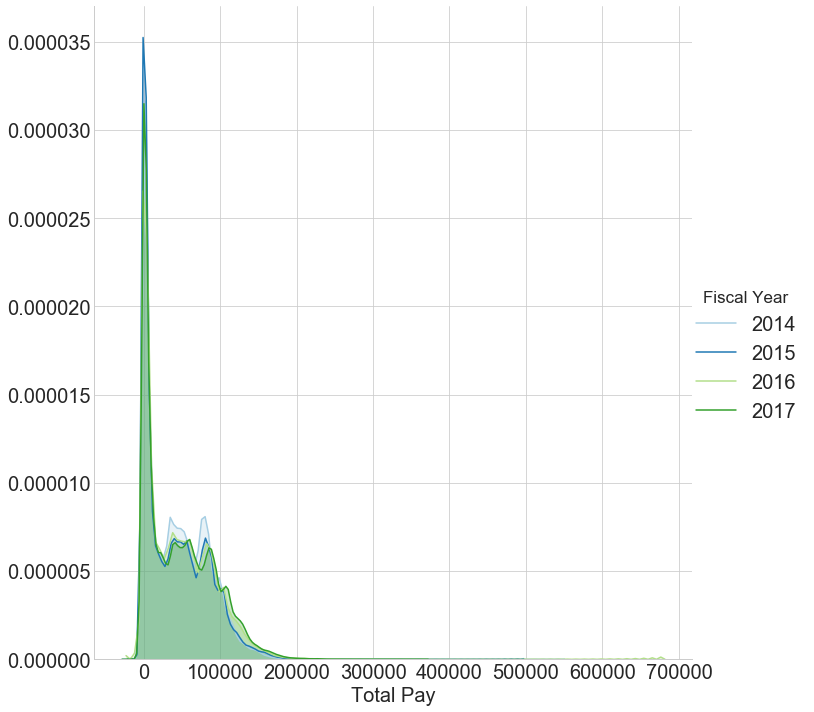

In [53]:
data['Fiscal Year'] = data['Fiscal Year'].astype(str)
plt.figure(figsize=(8,5))
g = sns.FacetGrid(data, hue='Fiscal Year', size=10, hue_order=['2014',
                                                              '2015',
                                                              '2016','2017'], palette="Paired")
g.map(sns.kdeplot, "Total Pay", shade=True)
g.add_legend()

In [54]:
data['Pay Basis'].unique()

array([' per Annum', ' per Hour', ' per Day', ' Prorated Annual',
       'per Annum', 'per Day', 'per Hour', 'Prorated Annual'],
      dtype=object)

## Pay Basis

Since there is a fair bit of difference in the payroll information based on the basis of pay - 
1. Pay by Annum (Annualy)
2. Pay by the Day
3. Pay by the Hour

So I thought it would be a good idea to segregate this data in order to analyse them differently since there is going to be a significant difference in the thier types of employers as well.

In [56]:
data_per_annum = data[data['Pay Basis'].isin([' per Annum',
                                           ' Prorated Annual',
                                           'per Annum','Prorated Annual'])].drop('Pay Basis',
                                                                                axis=1)
data_per_hour = data[data['Pay Basis'].isin([' per Hour',
                                           'per Hour'])].drop('Pay Basis', axis=1)
data_per_day = data[data['Pay Basis'].isin([' per Day',
                                           'per Day'])].drop('Pay Basis', axis=1)

print ("Per Annum Basis --> ",data_per_annum.shape,
       "\nPer Day Basis -- >", data_per_day.shape,
       "\nPer Hour Basis -- >", data_per_hour.shape)

Per Annum Basis -->  (1318029, 14) 
Per Day Basis -- > (465035, 14) 
Per Hour Basis -- > (411424, 14)


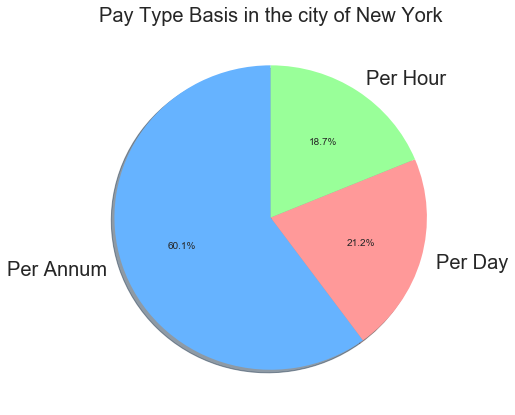

In [57]:
dist_pay_type = [data_per_annum.shape[0], data_per_day.shape[0], data_per_hour.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(dist_pay_type, labels=['Per Annum','Per Day','Per Hour'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Pay Type Basis in the city of New York")
plt.show()

In [60]:
def plot_high_low_pay(col, count, pay_basis):
    
    if (pay_basis=='Annum'):
        highest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20,25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=highest_paying_annum, 
                      orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=lowest_paying_annum, 
                      orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()
    elif (pay_basis == 'Day'):
        highest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_day, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_day, orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()
    elif (pay_basis=='Hour'):
        highest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_hour, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_hour, orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()

## Highest & the Lowest Paying Agencies 

### Pay by Annum

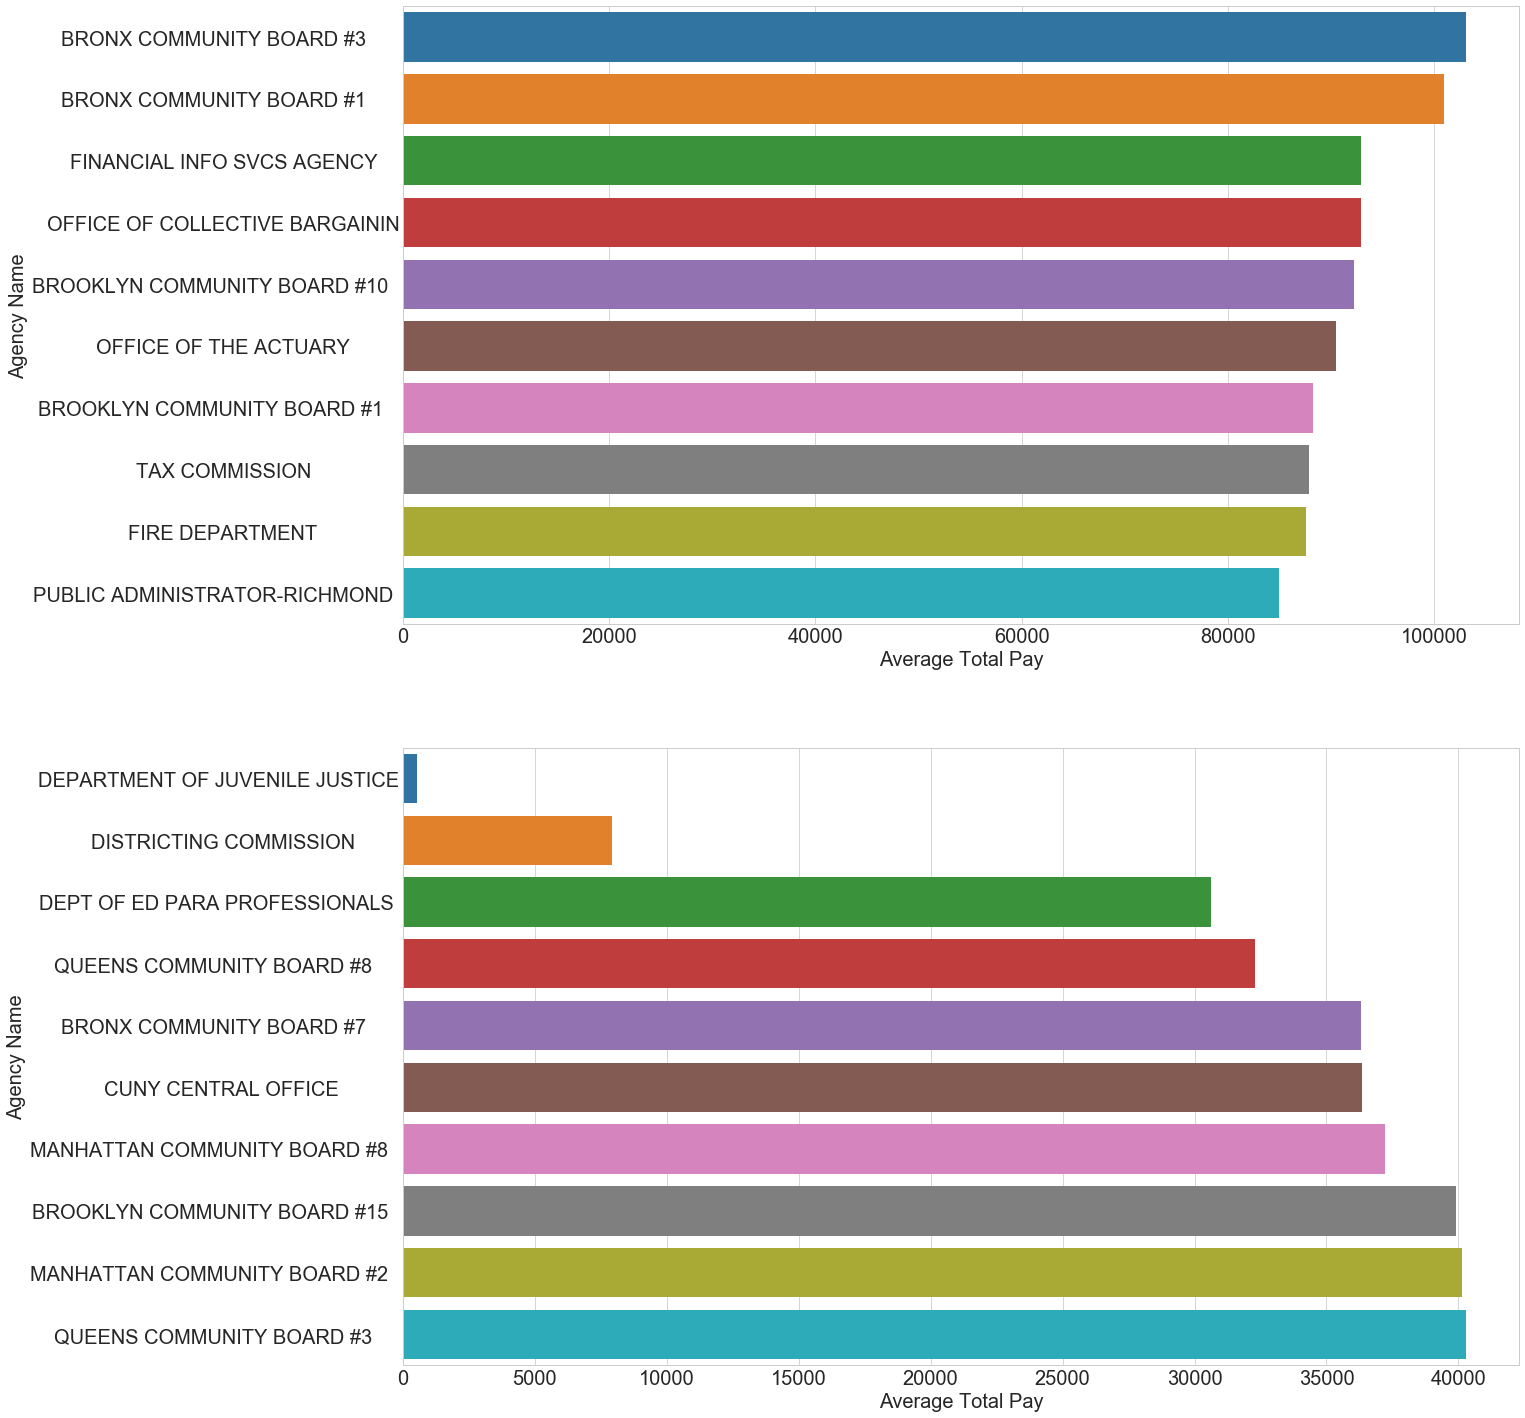

In [61]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Annum')

#### Pay by Day

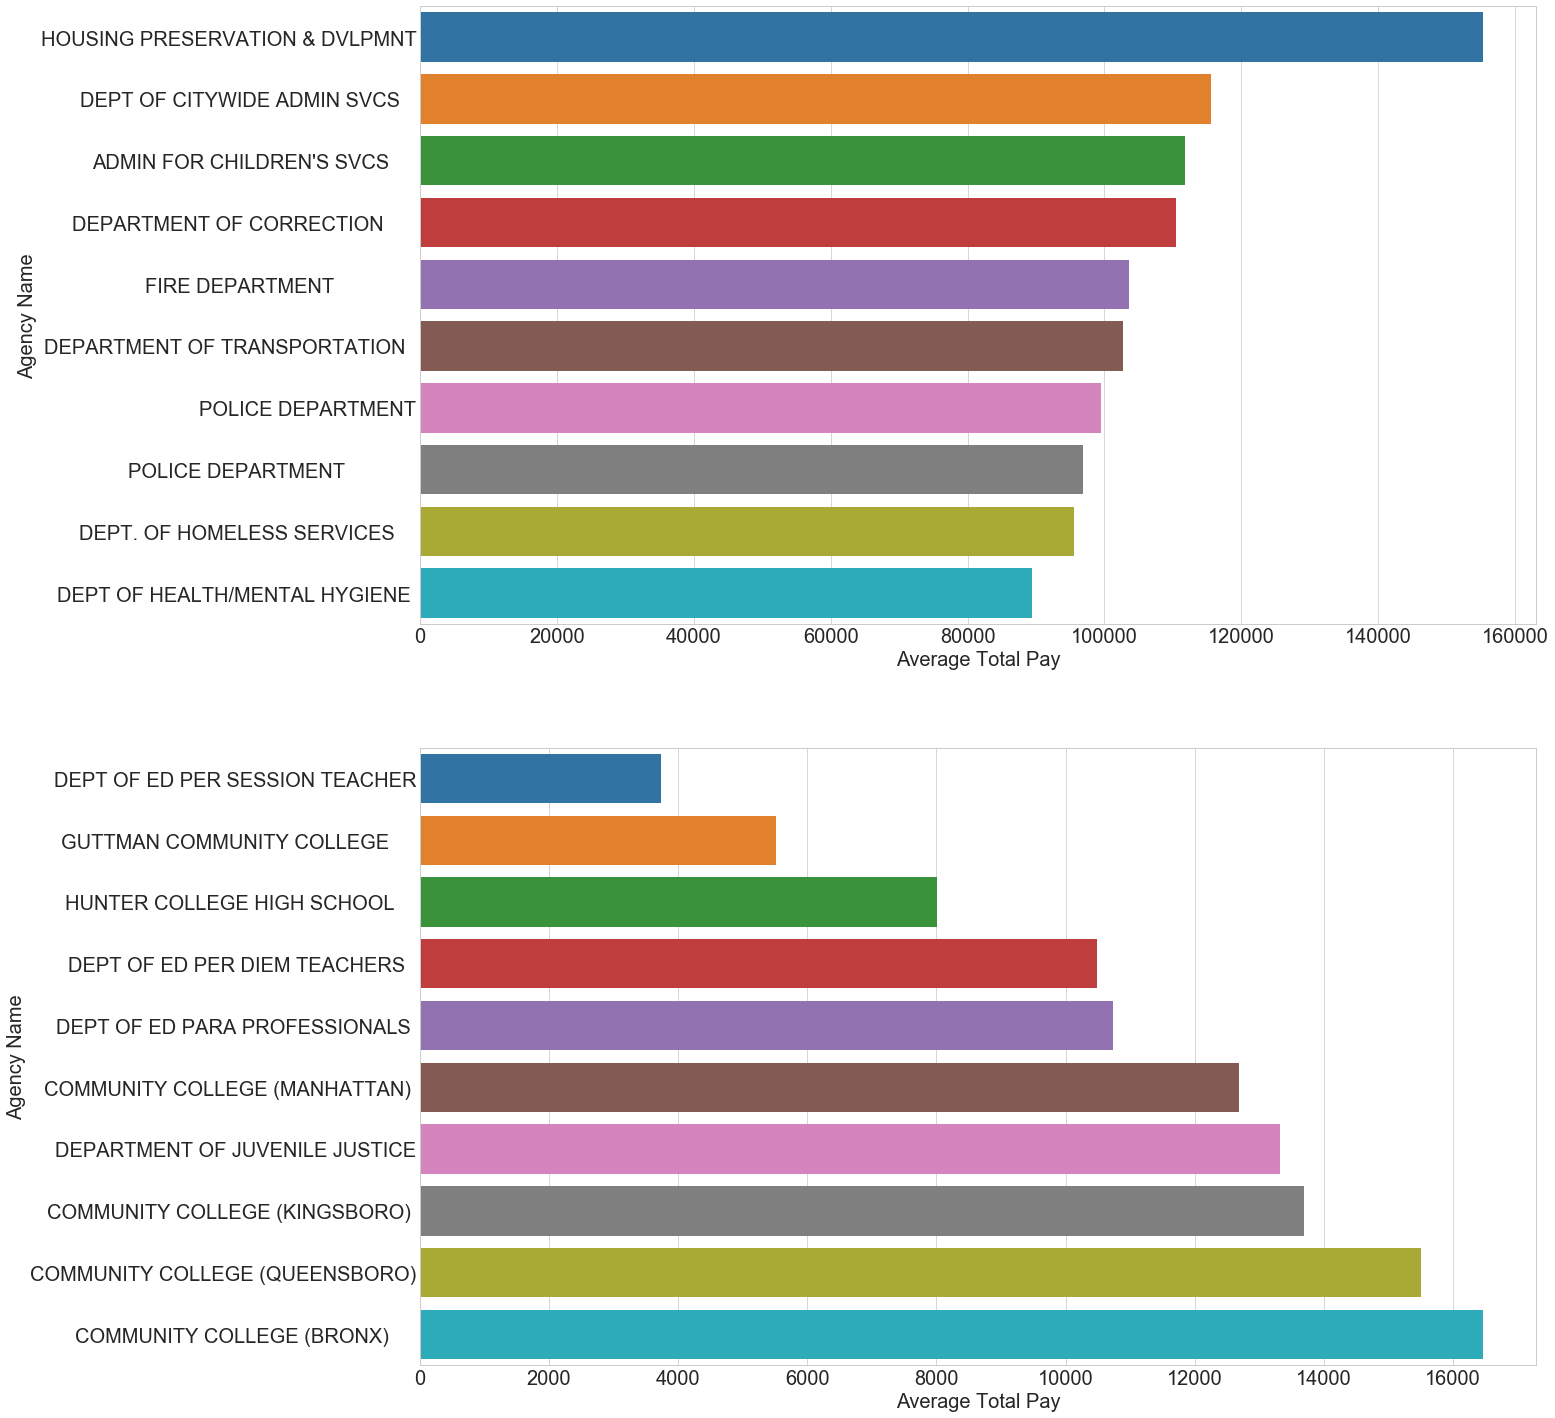

In [62]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Day')

#### Pay by Hour

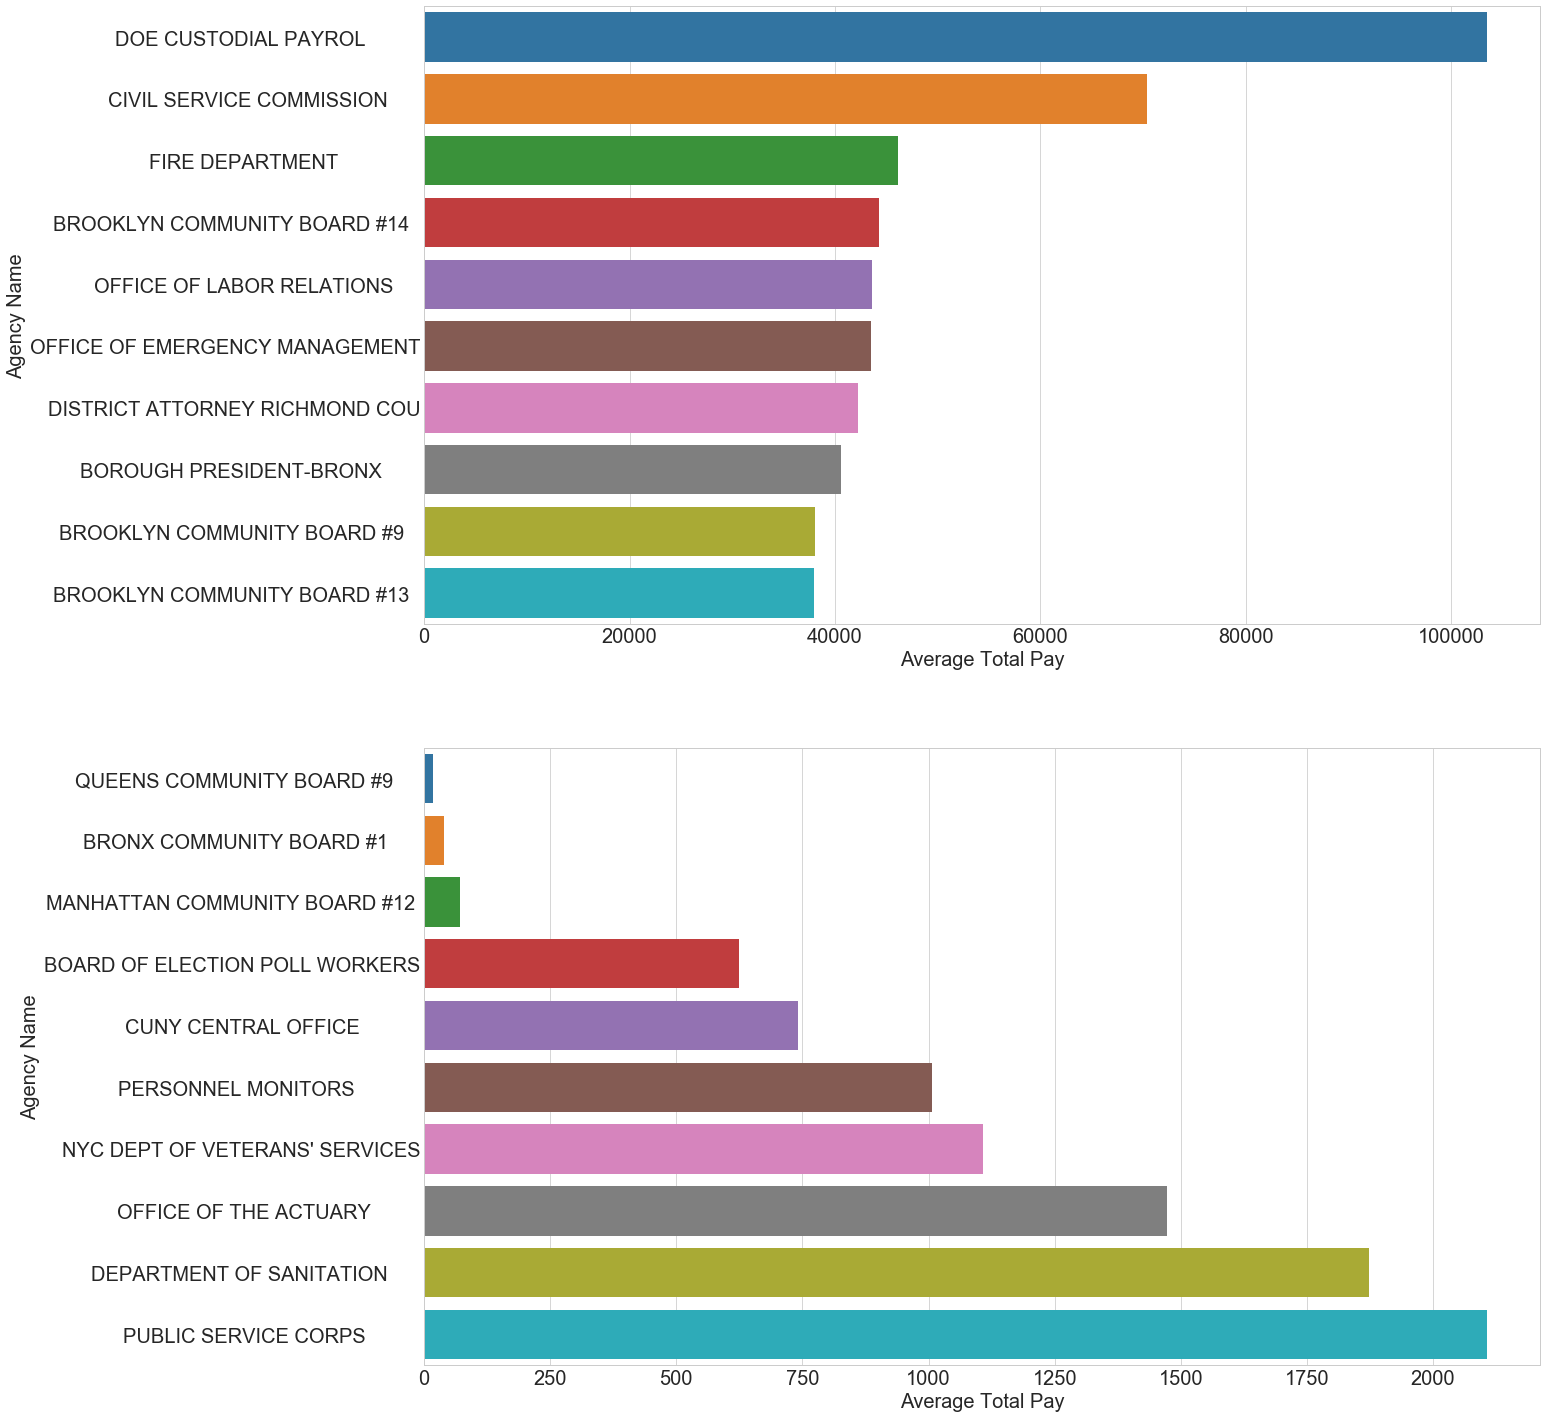

In [63]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Hour')

## Jobs that pay the most & least money in NYC

#### By Annum

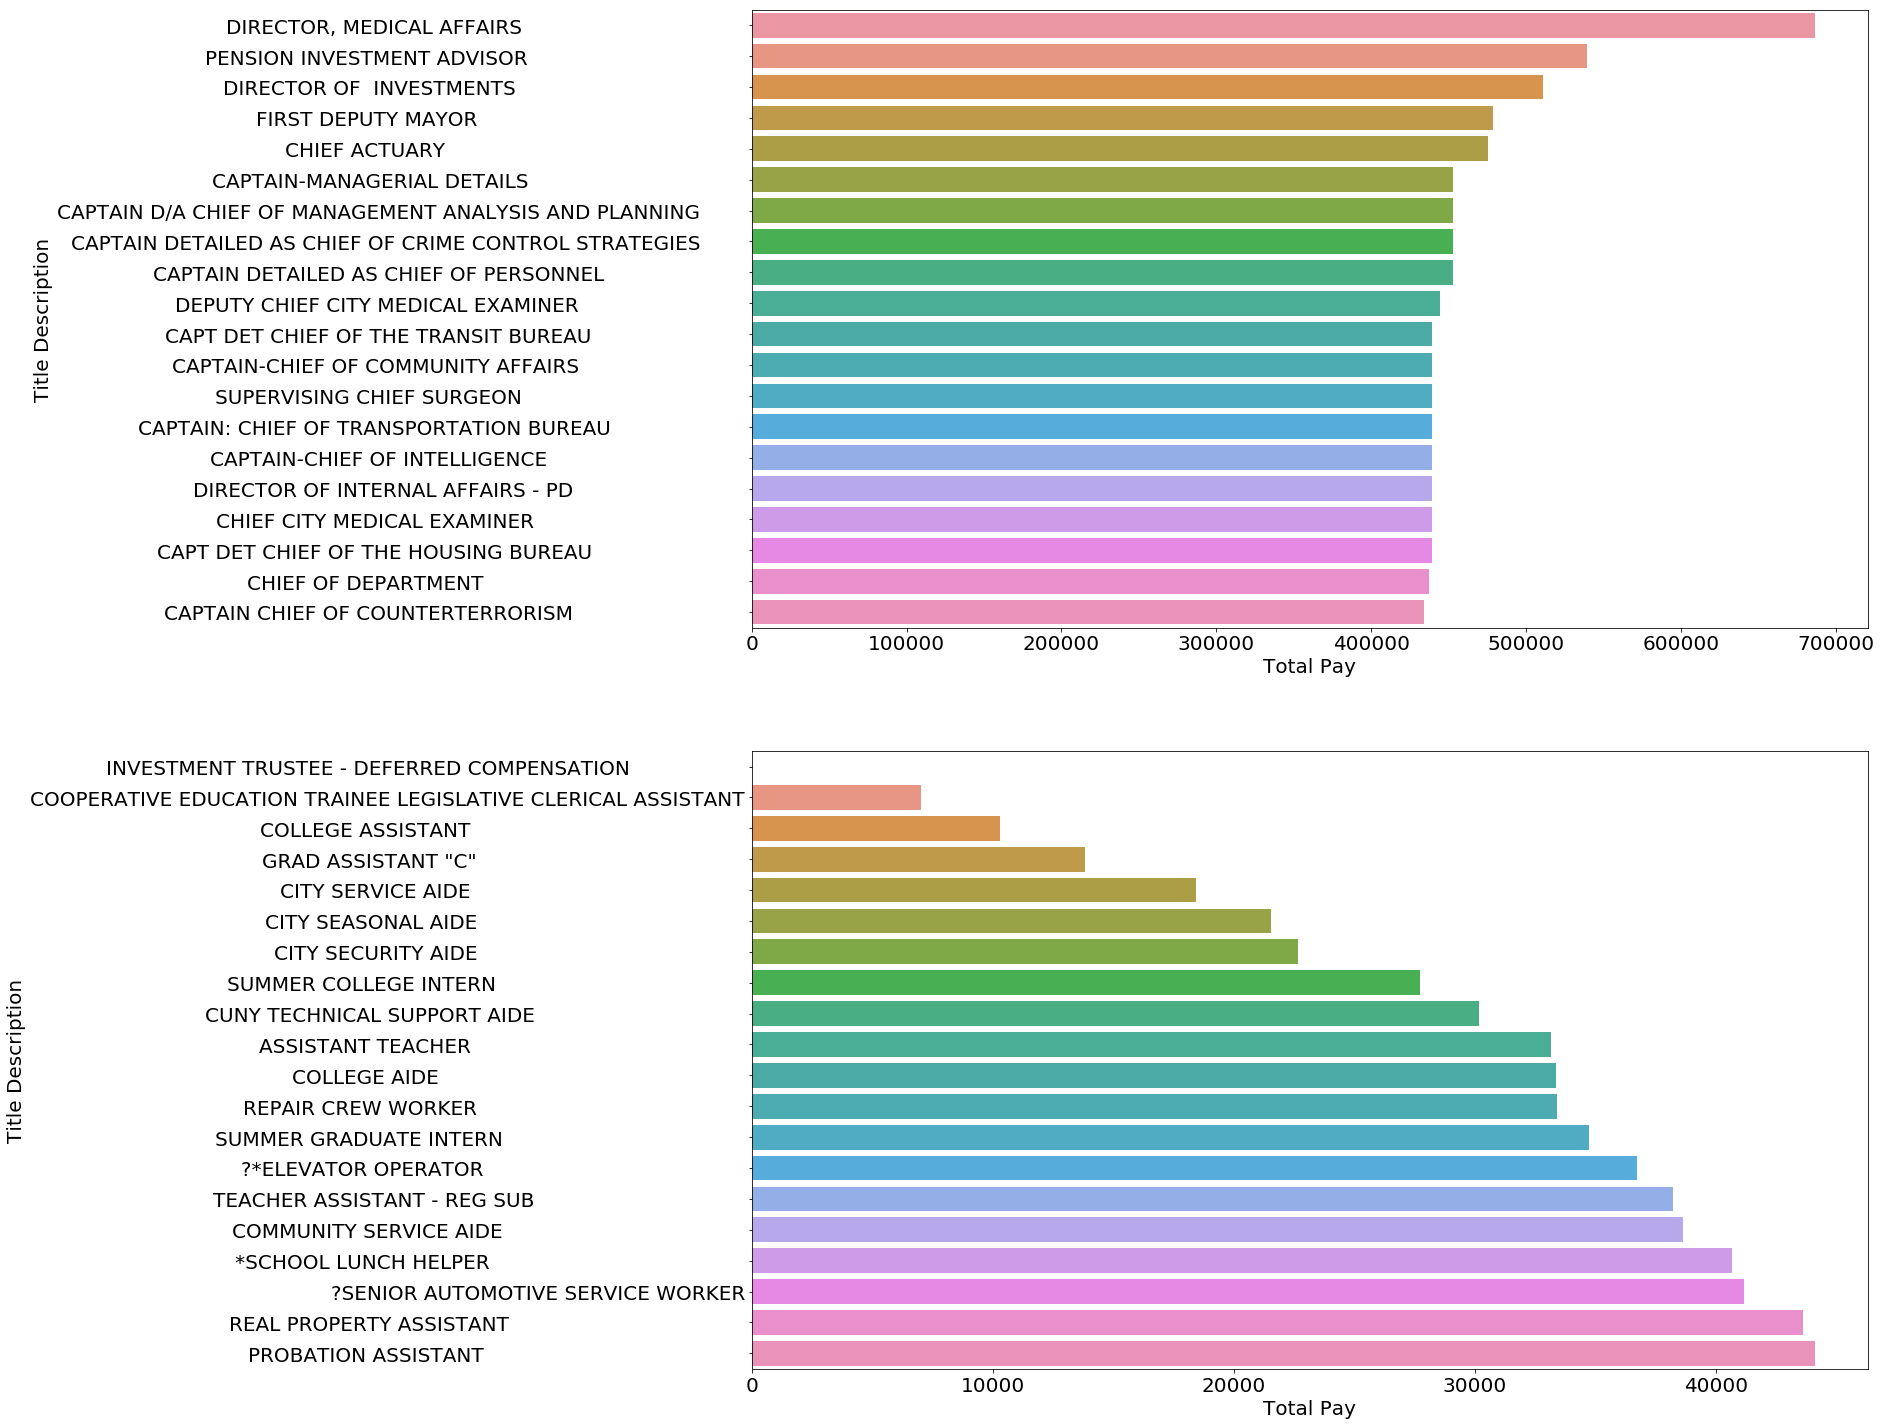

In [13]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Annum')

#### By Day

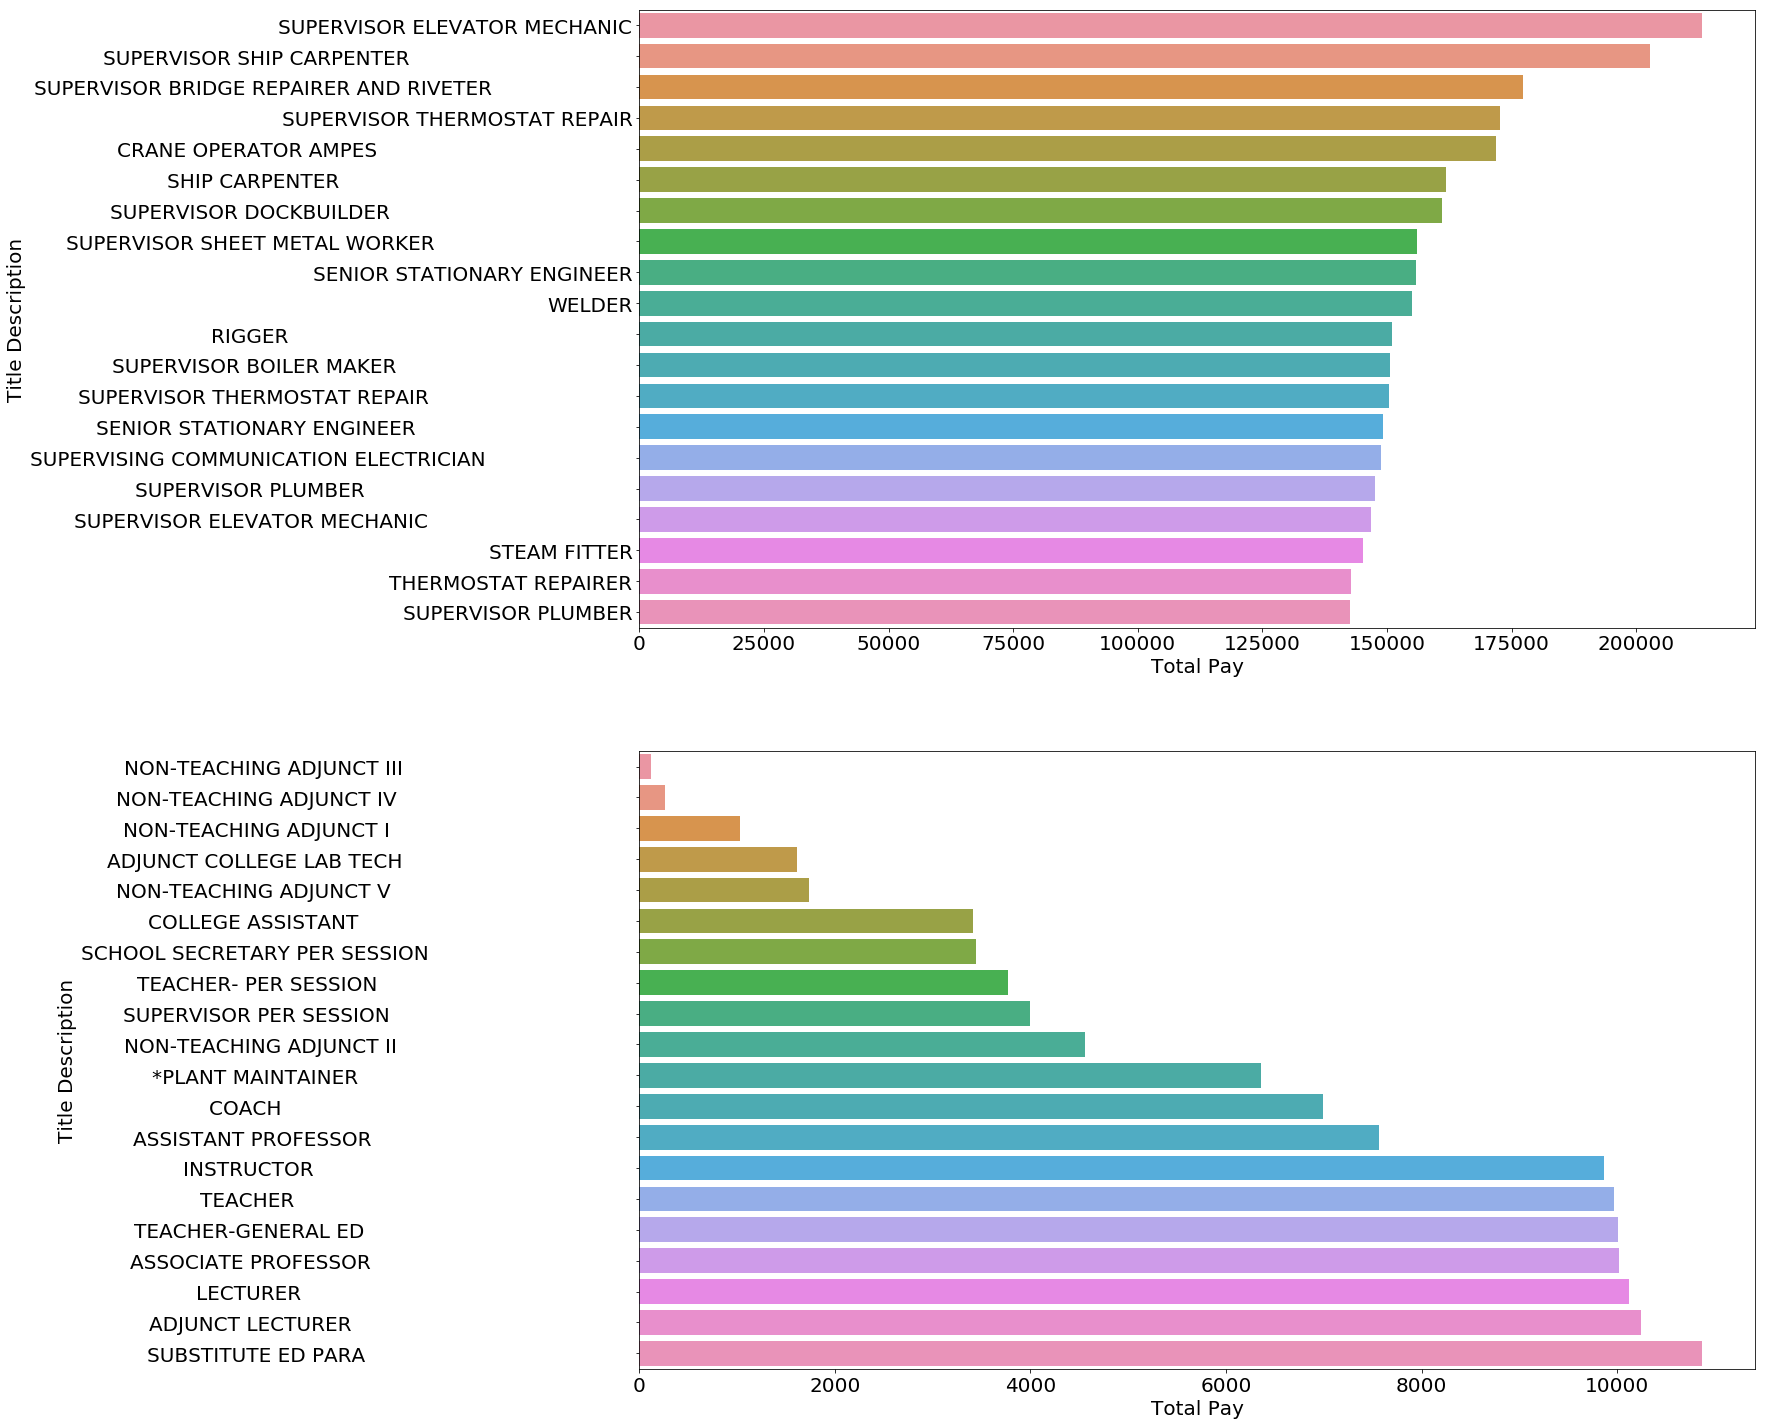

In [14]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Day')

#### By Hour

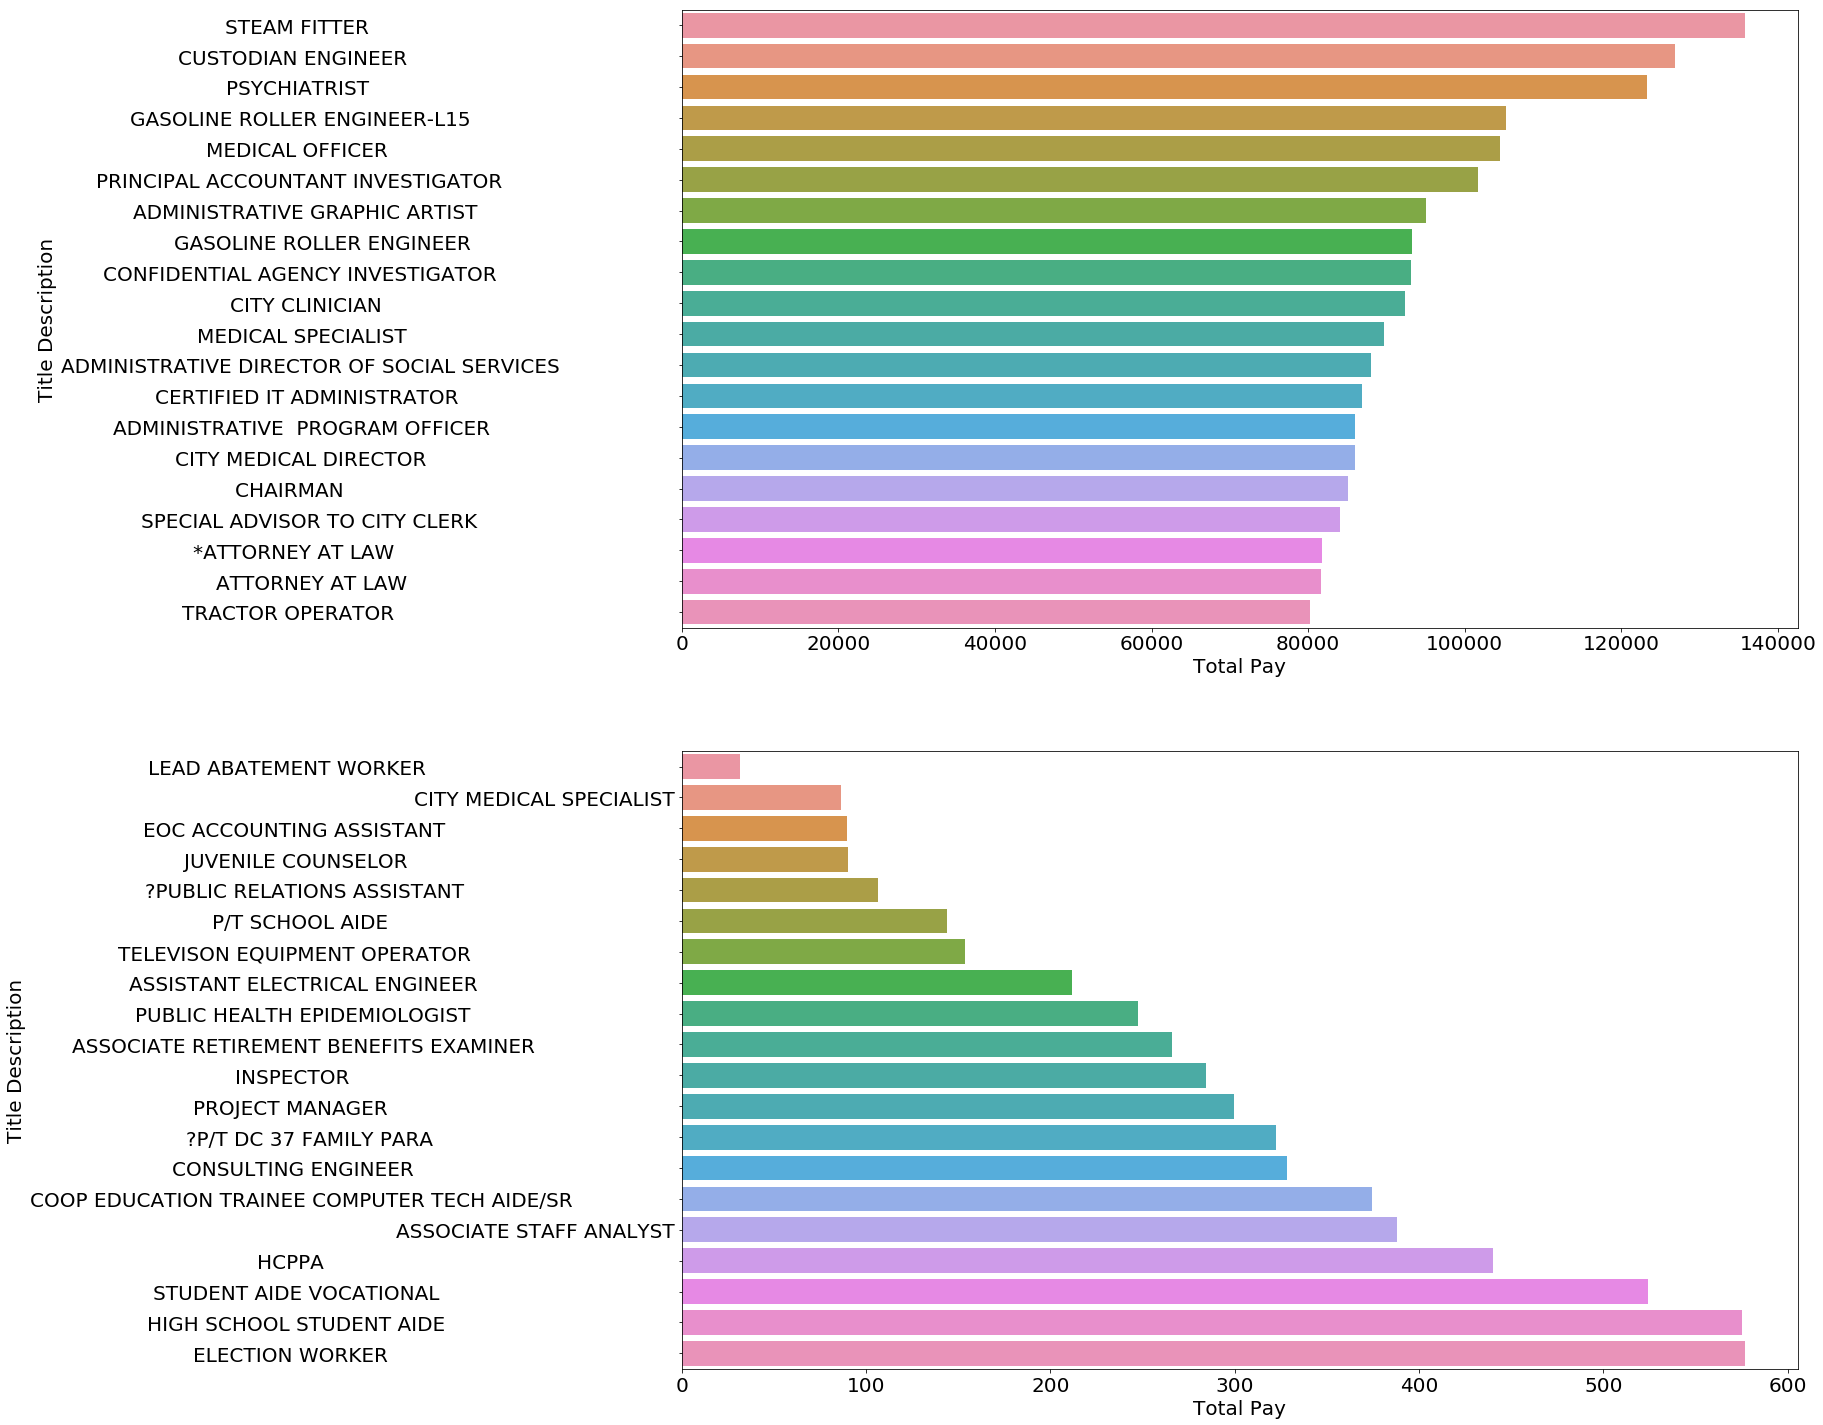

In [15]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Hour')

In [16]:
data['Work Location Borough'] = data['Work Location Borough'].str.strip().str.upper()
location_pay = data.groupby('Work Location Borough')['Total Pay'].mean().reset_index().sort_values('Total Pay',ascending=False)

## Average pay by Location

`Work Location Borough` tells us the area that a particular agency in NYC belongs to so it is interesting to know which one of these areas have the highest pay!

**Manhattan** didn't even crack the top 10, surprise!

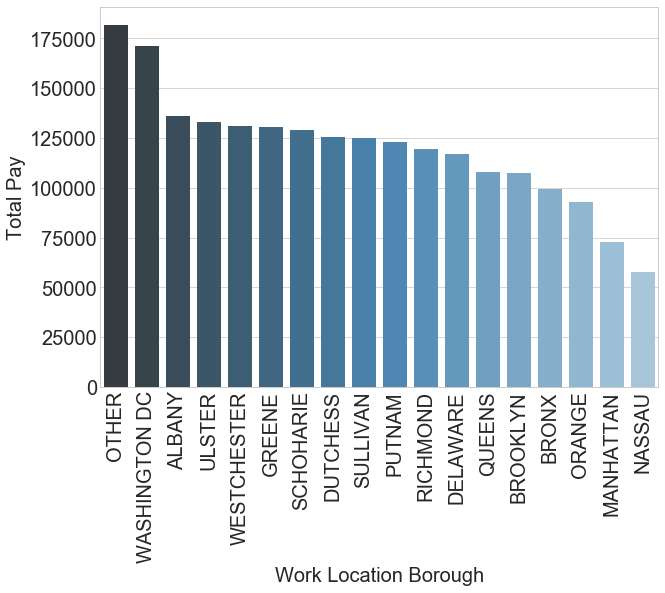

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.barplot(x=location_pay['Work Location Borough'], y=location_pay['Total Pay'],
           data=location_pay, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

# Overtime Compensations

1. Which agencies are making their employees work over time & by how much?
2. What is the average OverTime pay in these agencies?

In [41]:
data['Agency Name'] = data['Agency Name'].str.strip().str.upper()
ot_ = data.groupby('Agency Name')['OT Hours'].mean().reset_index().sort_values('OT Hours',ascending=False)
ot_ = ot_.head(10)
ot_pay = data.groupby('Agency Name')['Total OT Paid'].mean().reset_index().sort_values('Total OT Paid',ascending=False)
ot_pay = ot_pay.head(10)

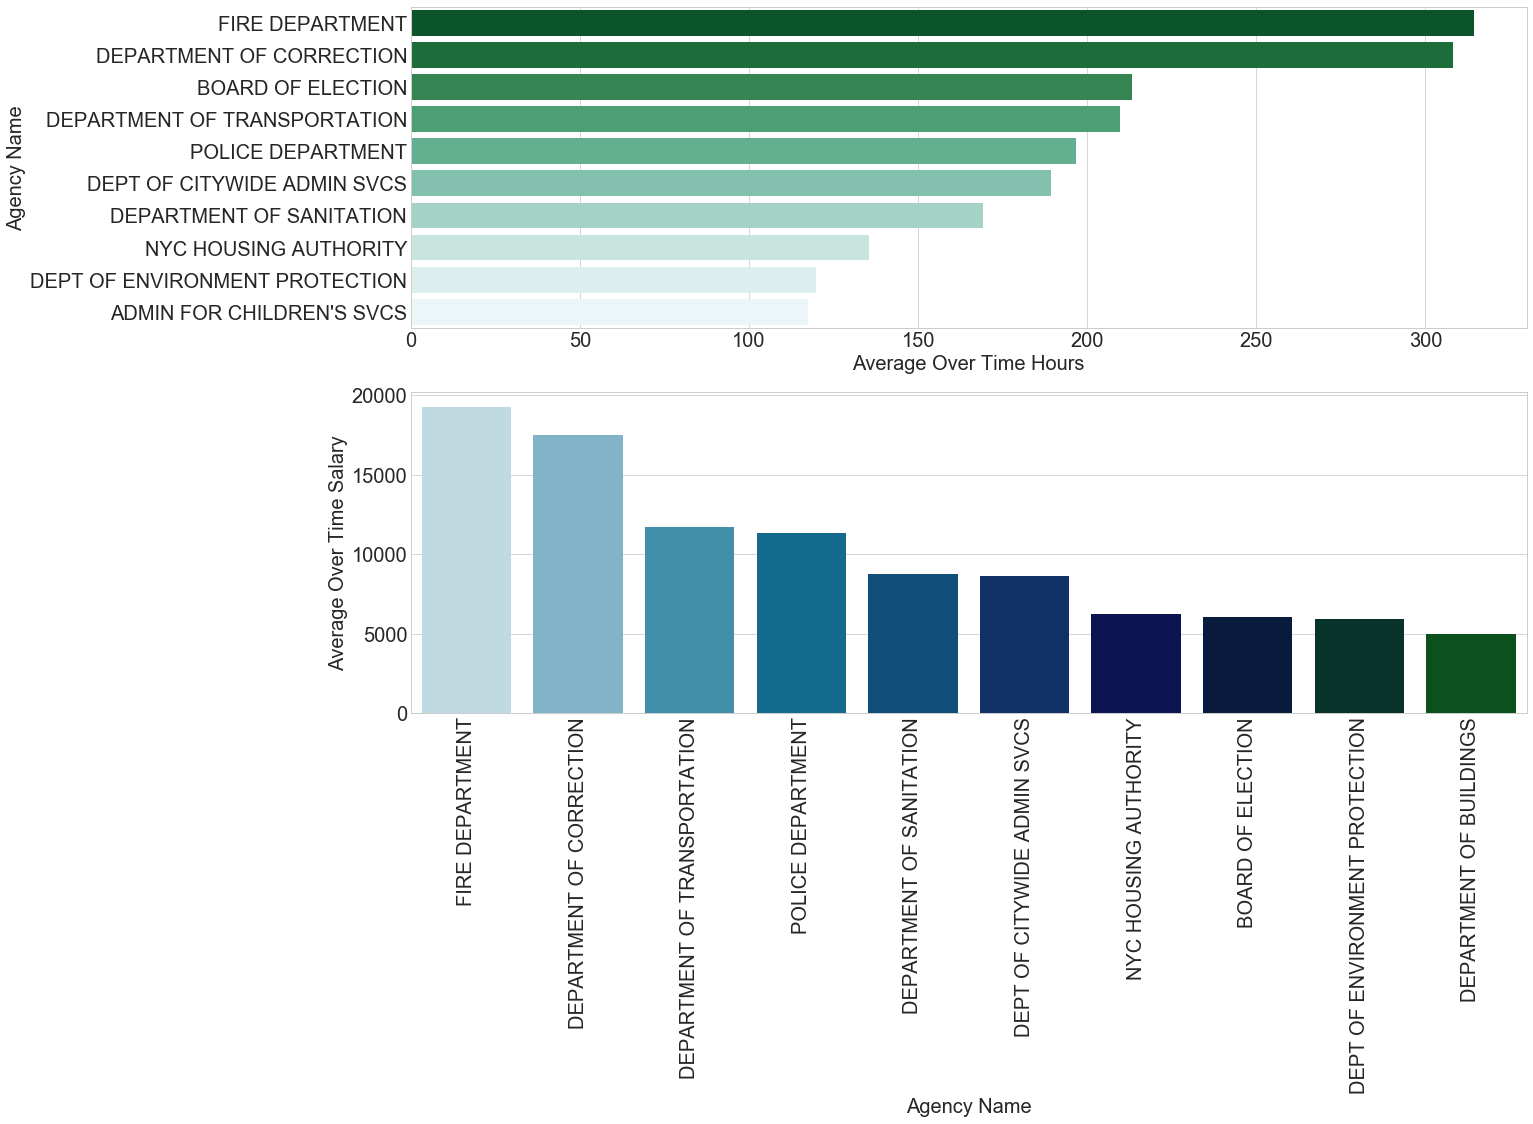

In [49]:
#sns.set_style("whitegrid")
f, ax = plt.subplots(2,1, figsize=(20,13))
sns.barplot(y=ot_['Agency Name'], x=ot_['OT Hours'],
           data=ot_, palette="BuGn_r", orient='h',ax=ax[0])
sns.barplot(x=ot_pay['Agency Name'], y=ot_pay['Total OT Paid'],
           data=ot_pay, palette="ocean_r", ax=ax[1])
ax[0].set_xlabel("Average Over Time Hours")
ax[1].set_ylabel("Average Over Time Salary")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

**Fire Dept & Dept of correction** occupy the top 2 spots in the highest number of average overtime hours.